<a href="https://colab.research.google.com/github/yuhui-0611/ESAA/blob/main/ESAA_YB_WEEK06_1_Classification_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **3. 앙상블 학습**

앙상블 학습을 통한 분류 : 여러 개의 분류기(Classifier)를 생성하고 그 예측을 결합함으로써 보다 정확한 예측 도출

앙상블 학습의 유형 : 보팅, 배깅, 부스팅
- 보팅과 배깅은 여러 개의 분류기가 투표를 통해 최종 예측 결과를 결정하는 방식
- 보팅은 서로 다른 알고리즘을 가진 분류기를 결합하는 것
- 배깅은 각각의 분류기가 모두 같은 유형의 알고리즘 기반이지만, 데이터 샘플링을 서로 다르게 가져가며 학습을 수행해 보팅 수행
- 랜덤 포레스트 알고리즘 = 대표적인 배깅 방식

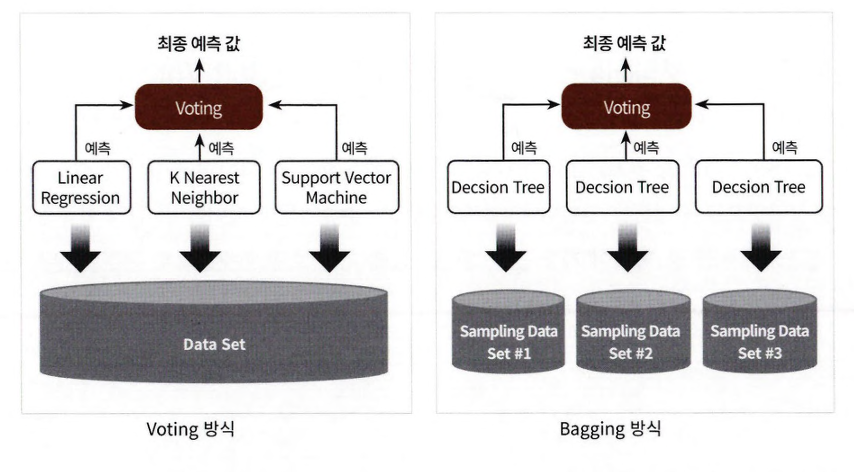

오른쪽 그림

- 단일 ML 알고리즘(결정 트리)으로 여러 분류기가 학습으로 개별 예측
- 개별 분류기에 할당된 학습 데이터는 원본 학습 데이터를 샘플링해 추출
- 이렇게 개별 Classifier에 데이터를 샘플링해서 추출하는 방식 = **부트스트래핑(Bootstrapping) 분할 방식**
- 개별 분류기가 부트스트래핑 방식으로 샘플링된 데이터 세트에 대해서 학습을 통해 개별적인 예측을 수행한 결과를 보팅을 통해서 최종 예측 결과를 선정하는 방식 = **배깅 앙상블 방식**
- 배깅 방식은 중복 허용

**보팅 유형 - 하드 보팅(Hard Voting)과 소프트 보팅(Soft Voting)**

< 하드 보팅 >

- 다수결 원칙과 비슷
- 예측 결과 값들 중 다수의 분류기가 결정한 예측값을 최종으로 선정

< 소프트 보팅 >

- 분류기들의 레이블 값 결정 확률을 모두 더하고, 이를 평균해서 이들 중 확률이 가장 높은 레이블 값을 최종 보팅 결과 값으로 선정

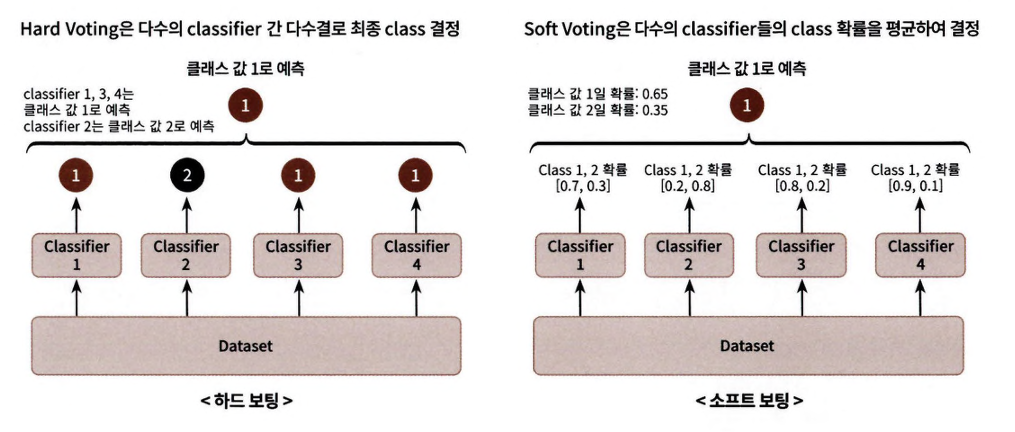

**보팅 분류기(Voting Classifier)**

보팅 방식의 앙상블을 이용해 위스콘신 유방암 데이터 세트를 예측 분석

위스콘신 유방암 데이터 세트는 유방암의 악성종양, 양성종양 여부를 결정하는 이진 분류 데이터 세트

사이킷런은 load_breast_cancer() 함수를 통해 자체에서 위스콘신 유방암 데이터 세트를 생성

In [ ]:
import pandas as pd

from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

cancer = load_breast_cancer()

data_df = pd.DataFrame(cancer.data, columns=cancer.feature_names)
data_df.head(3)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758


In [ ]:
# 개별 모델은 로지스틱 회귀와 KNN
lr_clf = LogisticRegression(solver='liblinear')
knn_clf = KNeighborsClassifier(n_neighbors=8)

# 개별 모델을 소프트 보팅 기반의 앙상블 모델로 구현한 분류기
vo_clf = VotingClassifier(estimators = [('LR',lr_clf), ('KNN',knn_clf)], voting = 'soft')   # 기본 = hard
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target,
                                                    test_size=0.2, random_state=156)

# VotingClassifier 학습/예측/평가
vo_clf.fit(X_train, y_train)
pred = vo_clf.predict(X_test)
print('Voting 분류기 정확도: {0:.4f}'.format(accuracy_score(y_test,pred)))

# 개별 모델의 학습/예측/평가
classifiers = [lr_clf, knn_clf]
for classifier in classifiers:
  classifier.fit(X_train, y_train)
  pred = classifier.predict(X_test)
  class_name = classifier.__class__.__name__
  print('{0} 정확도: {1:.4f}'.format(class_name, accuracy_score(y_test, pred)))

Voting 분류기 정확도: 0.9561
LogisticRegression 정확도: 0.9474
KNeighborsClassifier 정확도: 0.9386


- 보팅 분류기가 정확도가 조금 높게 나타났는데, 보팅으로 여러 개의 기반 분류기를 결합한다고 해서 무조건 기반 분류기보다 예측 성능이 향상되지는 않음
- 그럼에도 불구하고 지금 소개하는 보팅을 포함해 배징과 부스팅 등의 앙상블 방법은 전반적으로 다른 단일 ML 알고리즘보다 뛰어난 예측 성능을 가지는 경우가 많음
-  ML 모델의 성능은 이렇게 다양한 테스트 데이터에 의해 검증되므로 어떻게 높은 유연성을 가지고 현실에 대처할 수 있는가가 중요한 ML 모델의 평가요소
- 이런 관점에서 편향-분산 트레이드오프는 ML 모델이 극복해야 할 중요 과제
- 보팅과 스태킹 등은 서로 다른 알고리즘을 기반으로 하고 있지만, 배징과 부스팅은 대부분 결정 트리 알고리즘 기반
- 결정 트리 알고리즘은 쉽고 직관적인 분류 기준을 가지고 있지만 정확한 예측을 위해 학습 데이터의 예외 상황에 집착한 나머지 오히려 과적합이 발생해 실제 테스트 데이터에서 예측 성능이 떨어지는 현상이 발생하기 쉬움
- 하지만 앙상블 학습에서는 이 같은 결정 트리 알고리즘의 단점을 수십 ~ 수천 개의 매우 많은 분류기를 결합해 다양한 상황을 학습하게 함으로써 극복
- 결정 트리 알고리즘의 장점은 그대로 취하고 단점은 보완하면서 편향-분산 트레이드오프의 효과 극대화

# **4. 랜덤 포레스트**

**랜덤 포레스트의 개요 및 실습**

- 배깅 = 같은 알고리즘으로 여러 개의 분류기를 만들어서 보팅으로 최종 결정하는 알고리즘
- 배깅의 대표적인 알고리즘 = 랜덤 포레스트
- 랜덤 포레스트는 여러 개의 결정 트리 분류기가 전체 데이터에서 배깅 방식으로 각자의 데이터를 샘플링해, 개별적으로 학습을 수행한 뒤, 최종적으로 모든 분류기가 보팅을 통해 예측 결정

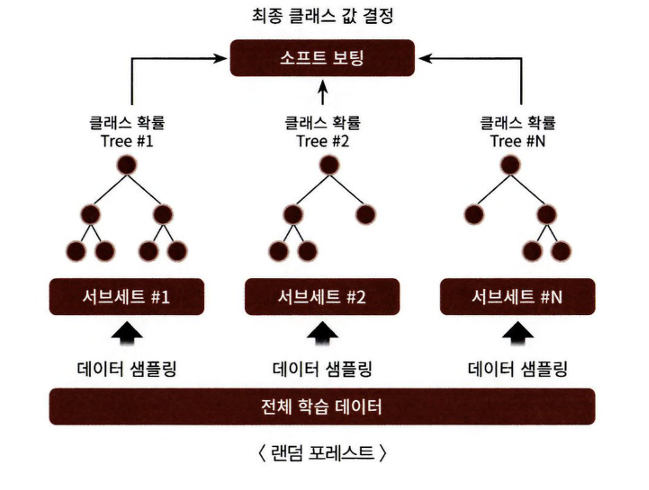

랜덤 포레스트는 개별적인 분류기의 기반 알고리즘은 결정 트리이지만, 개별 트리가 학습하는 데이터 세트는 전체 데이터에서 일부가 중첩되게 샘플링된 데이터 세트

이렇게 여러 개의 데이터 세트를 중첩되게 분리하는 것 = 부트스트래핑(bootstrapping) 분할 방식

원본 데이터의 건수가 10개인 학습 데이터 세트에 랜덤 포레스트를 3개의 결정 트리 기반으로 학습하려고 n_estimators= 3으로 하이퍼 파라미터를 부여하면 다음과 같이 데이터 서브세트가 만들어짐

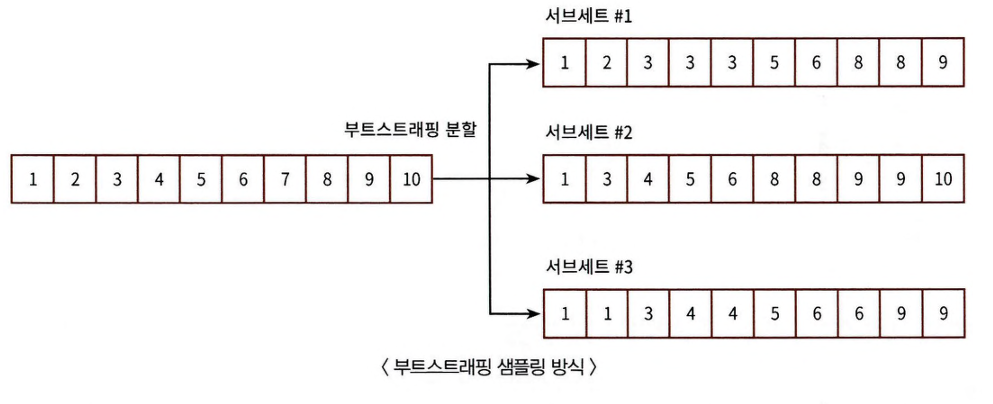

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [ ]:
def get_new_feature_name_df(old_feature_name_df):

  # cumcount() = 그룹 내에서 중복이 몇 번째 등장인지 세어줌
  feature_dup_df = pd.DataFrame(data = old_feature_name_df.groupby('column_name').cumcount(),
                                columns = ['dup_cnt'])

  # 인덱스를 기본 정수 인덱스로 리셋
  feature_dup_df = feature_dup_df.reset_index()

  # old_feature_name_df와 feature_dup_df를 인덱스를 기준으로 병합
  # how='outer' = 병합 시 key 값이 한쪽에만 있어도 포함
  new_feature_name_df = pd.merge(old_feature_name_df.reset_index(), feature_dup_df, how='outer')

  # 각 행에 대해 dup_cnt가 0이면 그대로 두고, 0보다 크면 _1, _2 등을 붙임
  new_feature_name_df['column_name'] = new_feature_name_df[['column_name',
                                                            'dup_cnt']].apply(lambda x: x[0]+'_'+str(x[1])
                                                            if x[1]>0 else x[0], axis=1)

  # reset_index() 과정에서 생긴 불필요한 index 열 삭제
  new_feature_name_df = new_feature_name_df.drop(['index'], axis=1)
  return new_feature_name_df

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
def get_human_dataset():

  # 각 데이터 파일은 공백으로 분리되어 있으므로 공백 문자를 sep으로 할당
  feature_name_df = pd.read_csv('/content/drive/MyDrive/ESAA/features.txt', sep='\s+',
                                header=None, names=['column_index', 'column_name'])

  # 중복된 피처명을 수정하는 get_new_feature_name_df( )를 이용, 신규 피처명 DataFrame 생성
  new_feature_name_df = get_new_feature_name_df(feature_name_df)

  # DataFrame에 피처명을 칼럼으로 부여하기 위해 리스트 객체로 다시 변환
  feature_name = new_feature_name_df.iloc[:,1].values.tolist()

  # 학습 피처 데이터 세트와 테스트 피처 데이터를 DataFrame으로 로딩, 칼럼명은 feature_name
  X_train = pd.read_csv('/content/drive/MyDrive/ESAA/X_train.txt', sep='\s+', names=feature_name)
  X_test = pd.read_csv('/content/drive/MyDrive/ESAA/X_test.txt', sep='\s+', names=feature_name)

  # 학습 레이블과 테스트 레이블 데이터를 DataFrame으로 로딩하고 칼럼명은 action으로 부여
  y_train = pd.read_csv('/content/drive/MyDrive/ESAA/y_train.txt', sep='\s+', names=['action'])
  y_test = pd.read_csv('/content/drive/MyDrive/ESAA/y_test.txt', sep='\s+', names=['action'])

  # 로드된 학습/테스트용 DataFrame을 모두 반환
  return X_train, X_test, y_train, y_test

In [ ]:
# 결정 트리에서 사용한 get_human_dataset()을 이용해 학습/테스트용 DataFrame 반환
X_train, X_test, y_train, y_test = get_human_dataset()

# 랜덤 포레스트 학습 및 별도의 테스트 세트로 예측 성능 평가
rf_clf = RandomForestClassifier(random_state=0, max_depth=8)
rf_clf.fit(X_train, y_train)
pred = rf_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred)
print('랜덤 포레스트 정확도: {0:.4f}'.format(accuracy))

랜덤 포레스트 정확도: 0.9220


**랜덤 포레스트 하이퍼 파라미터 및 튜닝**

- n_estimator : **랜덤 포레스트에서 결정 트리의 개수를 지정**

디폴트는 10개

많이 설정할수록 좋은 성능을 기대할 수 있지만 계속 증가시킨다고 성능이 무조건 향상되는 것은 아니며 늘릴수록 학습 수행 시간이 오래 걸림

- max_features : **각 트리가 데이터를 분할할 때 고려할 특징의 개수를 정하는 옵션**

결정 트리에 사용된 max_features 파라미터와 같음(결정트리에서는 분할할 때 모든 열을 다 고려할 수 있지만 랜덤 포레스트는 일부 피처만 무작위로 선택해서 사용)

RandomForestClassifier의 기본 max_features는 'None'이 아니라 'auto', 즉 'sqrt'와 같기에 랜덤 포레스트의 트리를 분할하는 피처를 참조할 때 전체 피처가 아니라 'sqrt(전체 피처 개수)'만큼 참조한다는 점이 다른 점

> ex. 전체 피처가 16개라면 분할을 위해 4개 참조

- *max_depth, min_samples_leat, min_samples_split*와 같이 결정 트리에서 과적합을 개선하기 위해 사용되는 파라미터가 랜덤 포레스트에도 똑같이 적용될 수 있음

랜덤 포레스트는 CPU 병렬 처리도 효과적으로 수행되어 빠른 학습이 가능하기에 그래디언트 부스팅보다 예측 성능이 떨어지더라도 랜덤 포레스트로 기반 모델을 구축하는 경우가 많음

In [ ]:
from sklearn.model_selection import GridSearchCV

params={
    'max_depth':[8,16,24],
    'min_samples_leaf':[1,6,12],
    'min_samples_split':[2,8,16]
}
# RandomForestClassifier 객체 생성 후 GridSearchCV 수행.
rf_clf=RandomForestClassifier(n_estimators=100,random_state=0,n_jobs=-1)
grid_cv=GridSearchCV(rf_clf,param_grid=params,cv=2,n_jobs=-1)
grid_cv.fit(X_train,y_train)

print('최적 하이퍼 파라미터:\n',grid_cv.best_params_)
print('최고 예측 정확도:{0:.4f}'.format(grid_cv.best_score_))

최적 하이퍼 파라미터:
 {'max_depth': 16, 'min_samples_leaf': 6, 'min_samples_split': 16}
최고 예측 정확도:0.9157


In [ ]:
rf_clf1 = RandomForestClassifier(n_estimators = 100, min_samples_leaf = 6, max_depth = 16, min_samples_split = 2, random_state = 0)
rf_clf1.fit(X_train,y_train)
pred = rf_clf1.predict(X_test)
print('예측 정확도:{0:.4f}'.format(accuracy_score(y_test,pred)))

예측 정확도:0.9253


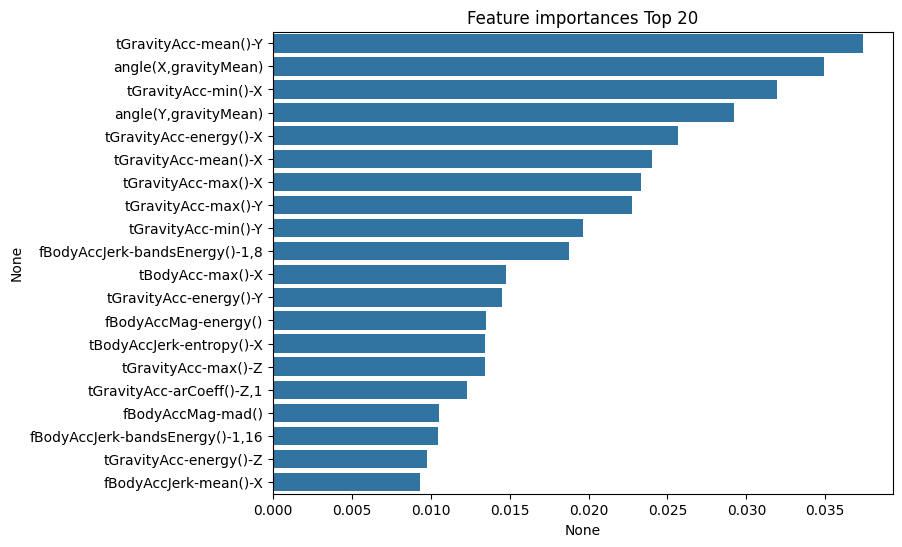

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# feature_importances_ : 랜덤 포레스트, 결정 트리 등에서 어떤 변수가 예측에 얼마나 중요한 역할을 했는지를 알려주는 속성
ftr_importances_values = rf_clf1.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index = X_train.columns)
ftr_top20 = ftr_importances.sort_values(ascending = False)[:20]

plt.figure(figsize = (8,6))
plt.title('Feature importances Top 20')
sns.barplot(x = ftr_top20, y = ftr_top20.index)
plt.show()

# **5. GBM (Gradient Boosting Machine)**

**GBM 개요 및 실습**

- 부스팅 알고리즘은 여러 개의 약한 학습기를 순차적으로 학습 및 예측을 하며 잘못 예측한 데이터에 가중치 부여를 통해 오류를 개선하며 학습하는 방식
- AdaBoost(Adaptive boosting) & 그래디언트 부스트

<에이타 부스트 Ada Boost>

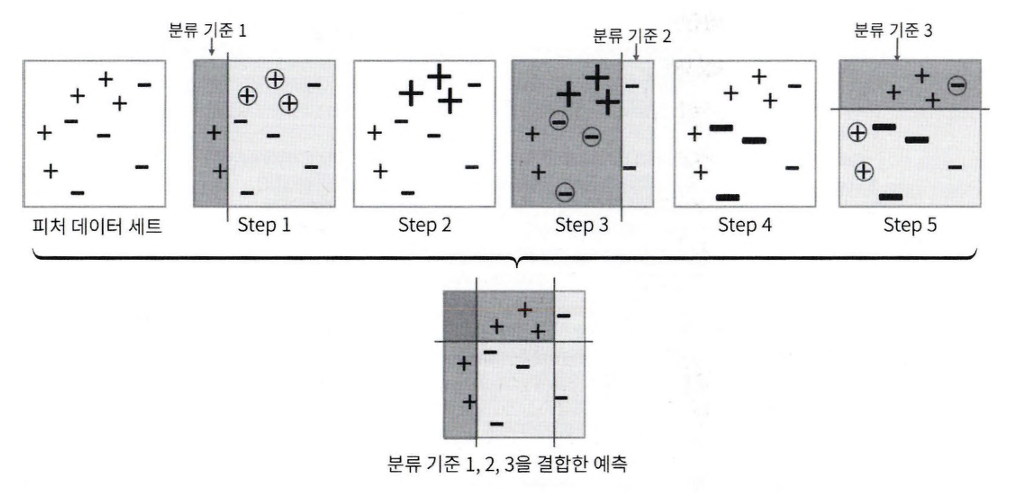

- Step 1 : 첫 번째 약한 학습기(weak learner)가 분류 기준 1로 +와 -를 분류한 것, 동그라미로 표시된 + 데이터는 + 데이터가 잘못 분류된 오류 데이터

- Step 2 : 이 오류 데이터에 대해서 가중치 값을 부여, 가중치가 부여된 오류 + 데이터는 다음 약한 학습기가
더 잘 분류할 수 있게 크기가 커짐
- Step 3 : 두 번째 약한 학습기가 분류 기준 2로 +와 - 를 분류, 마찬가지로 동그라미로 표시된 0 데이터는 잘못 분류된 오류 데이터
- Step 4에서는 잘못 분류된 이 - 오류 데이터에 대해 다음 약한 학습기가 잘 분류할 수 있게 더 큰 가중치를 부여 (오류 - 데이터의 크기가 커짐)
- Step 5는 세 번째 약한 학습기가 분류 기준 3으로 +와 -를 분류하고 오류 데이터를 찾음, 에이다부스트는 이렇게 **약한 학습기가 순차적으로 오류 값에 대해 가중치를 부여한 예측 결정 기준을 모두 결합해 예측을 수행**
- 마지막으로 맨 아래에는 첫 번째, 두 번째, 세 번째 약한 학습기를 모두 결합한 결과 예측, 개별 약한 학습기보다 훨씬 정확도가 높아졌음을 알 수 있음

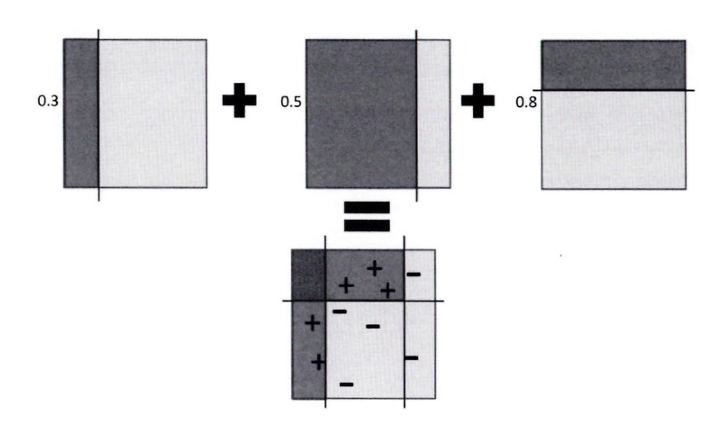

GBM도 에이다부스트와 유사하지만, 가중치 업데이트를 경사 하강법(Gradient Descent)을 이용하는 것이 큰 차이

- 오류값 = 실제값 - 예측값

이 오류값을 최소화하는 방향성을 가지고 반복적으로 가중치 값을 업데이트하는 것이 "경사 하강법"

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
import time
import warnings
warnings.filterwarnings('ignore')

X_train, X_test, y_train, y_test = get_human_dataset()

# GBM 수행 시간 측정을 위해 시작 시간 설정
start_time = time.time()

gb_clf = GradientBoostingClassifier(random_state = 0)
gb_clf.fit(X_train, y_train)
gb_pred = gb_clf.predict(X_test)
gb_accuracy = accuracy_score(y_test, gb_pred)

print('GBM 정확도:{0:.4f}'.format(gb_accuracy))
print("GBM 수행 시간:{0:.1f}초".format(time.time() - start_time))

GBM 정확도:0.9379
GBM 수행 시간:1445.2초


**GBM 하이퍼 파라미터 소개**

- loss : 경사 하강법에서 사용할 비용 함수를 지정, 특별한 이유가 없으면 기본값인 'deviance'를 그대로 적용
- learning_rate : GBM이 학습을 진행할 때마다 적용하는 학습률, Weak learner가 순차적으로 오류 값을 보정해 나가는 데 적용하는 계수

> 0~1 사이의 값을 지정할 수 있으며 기본값은 0.1

> 너무 작은 값을 적용하면 업데이트되는 값이 작아져서 최소 오류 값을 찾아 예측 성능이 높아질 가능성이 높지만 많은 weak learner는 순차적인 반복이 필요해서 수행 시간이 오래 걸리고, 또 너무 작게 설정하면 모든 weak learner의 반복이 완료돼도 최소 오류 값을 찾지 못할 수 있음

> 반대로 큰 값을 적용하면 최소 오류 값을 찾지 못하고 그냥 지나쳐 버려 예측 성능이 떨어질 가능성이 높아지지만, 빠른 수행이 가능, 이러한 특성 때문에 leaming_rate는 n_estimators와 상호 보완적으로 조합해 사용

> learning_rate를 작게 하고 n_estimators를 크게 하면 더 이상 성능이 좋아지지 않는 한계점까지는 예측 성능이 조금씩 좋아질 수 있지만 수행 시간이 너무 오래 걸리는 단점이 있으며, 예측 성능 역시 현격히 좋아지지는 않음
- n_estimators : weak learner의 개수

> weak learner가 순차적으로 오류를 보정하므로 개수가 많을수록 예측 성능이 일정 수준까지는 좋아질 수 있지만 개수가 많을수록 수행 시간이 오래 걸림

> 기본값은 100

- subsample : weak learner가 학습에 사용하는 데이터의 샘플링 비율

> 기본값은 1이며, 이는 전체 학습 데이터를 기반으로 학습한다는 의미(0.5이면 학습 데이터의 50%)

> 과적합이 염려되는 경우 subsample을 1보다 작은 값으로 설정

# **6. XGBoost (eXtra Gradient Boost)**

< XGBoost의 주요 장점>

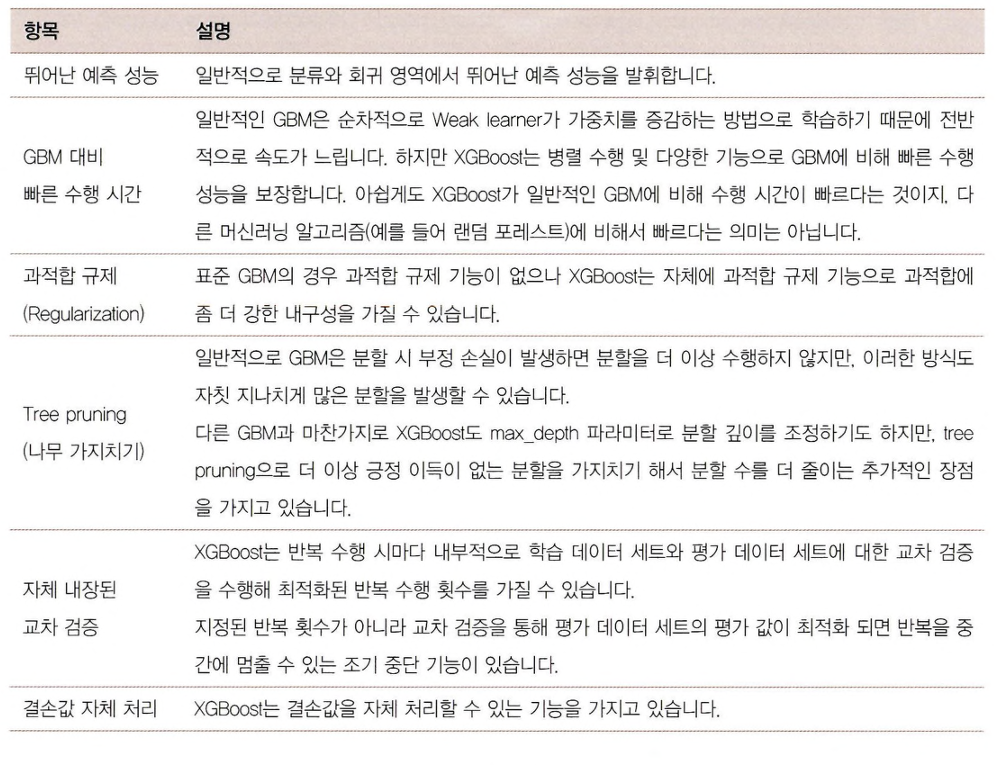

In [1]:
import xgboost as xgb
from xgboost import XGBClassifier

**< 파이썬 래퍼 XGBoost 하이퍼 파라미터 >**

- 일반 파라미터 : 일반적으로 실행 시 스레드의 개수나 silent = 등의 선택을 위한 파라미터로서 디폴트 파라미터 값을 바꾸는 경우는 거의 X
- 부스터 파라미터 : 트리 최적화, 부스팅, reg나arization 등과 관련 파라미터 등을 지칭
- 학습 태스크 파라미터 : 학습 수행 시의 객체 함수, 평가를 위한 지표 등을 설정하는 파라미터

**주요 일반 파라미터**

- booster : gbtree(tree based model) 또는 gblinear( linear model) 선택, 디폴트는 gbtree
- silent : 디폴트는 0이며, 출력 메시지를 나타내고 싶지 않을 경우 1로 설정
- nthread : CPU의 실행 스레드 개수를 조정하며, 디폴트는 CPU의 전체 스레드를 다 사용하는 것, 멀티 코어/스레드 CPU 시스템에서 전체 CPU를 사용하지 않고 일부 CPU만 사용해 ML 애플리케이션을 구동하는 경우에 변경

**주요 부스터 파라미터**

- eta: 부스팅 스텝을 반복적으로 수행할 때 업데이트되는 학습률 값, 0 ~ 1 사이 값 지정, default=0.3(파이썬 래퍼 기반 xgboost)
- num_boost_rounds: GBM의 n_estimators와 같음
- min_child_weight: 트리에서 추가적으로 가지를 나눌지 결정하기 위해 핑요한 데이터들의 weight 총합 > 과적합 조절
- gamma: 트리의 리프 노드를 추가적으로 나눌지 결정할 최소 손실 감소 값, 해당 값보다 큰 손실이 감소된 경우 리프 노드를 분리 > 과적합 조절(값이 클수록 과적합 감소)
- max_depth: 3~10 사이의 값 입력(default=6)
- sub_sample: 트리가 커져 과적합되는 것을 제어하기 위해 데이터를 샘플링하는 비율을 지정, 0.5~1 사이의 값을 사용(defalut=1)
- colsample_bytree: 트리 생성에 필요한 피처를 임의로 샘플링하는 데 사용. 매우 많은 피처가 있을 경우 과적합 조절(default=1)
- lambda: L2 Regularization 적용 값 > 과적합 조절
- alpha: L1 Regularization 적용 값 > 과적합 조절
- scale_pos_weight: 특정 값으로 치우친 비대칭한 클래스로 구성된 데이터 세트의 균형을 유지하기 위한 파라미터(default=1)

**학습 태스크 파라미터**

- objective: 최솟값을 가져야 할 손실 함수를 정의.
- binary:logistic: 이진 분류일 때 적용.
- multi:softmax: 다중 분류일 때 적용.
- multi:softprob: 개별 레이블 클래스의 해당되는 예측 확률을 반환
- eval_metric: 검증에 사용되는 함수 정의
> 회귀일 경우 rmse / 분류일 경우 error

**과적합 문제가 심각할 경우**

1. eta 낮추기(0.01~0.1) + num_round 높이기
2. max_depth 낮추기
3. min_child_weight 높이기
4. gamma 높이기
5. subsample, colsample_bytree 조정

In [2]:
import xgboost

print(xgboost.__version__)

3.0.5


**파이썬 래퍼 GXBoost 적용 - 위스콘신 유방암 예측**

위스콘신 유방암 데이터 세트는 종양의 크기, 모양 등의 다양한 속성값을 기반으로 악성 종양(malignant)인지 양성 종양(benign)인지를 분류한 데이터 세트

In [3]:
import xgboost as xgb
from xgboost import plot_importance
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

dataset = load_breast_cancer()
features = dataset.data
labels = dataset.target
cancer_df = pd.DataFrame(data=features,columns=dataset.feature_names)
cancer_df['target'] = labels
cancer_df.head(3)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0


In [4]:
print(dataset.target_names)
print(cancer_df['target'].value_counts())

['malignant' 'benign']
target
1    357
0    212
Name: count, dtype: int64


In [5]:
# cancer_df에서 feature용 DataFrame과 Label용 Series 객체 추출
# 맨 마지막 칼럼이 Label
# Feature용 DataFrame은 cancer_df의 첫번째 칼럼에서 맨 마지막 두번째 칼럼까지를 :-1 슬라이싱으로 추출
X_features = cancer_df.iloc[:,:-1]
y_label = cancer_df.iloc[:,-1]

# 전체 데이터 중 80%는 학습용 데이터, 20%는 테스트용 데이터 추출
X_train, X_test, y_train, y_test = train_test_split(X_features, y_label, test_size=0.2, random_state=156)

# 위에서 만든 X_train, y_train을 다시 쪼개서 90%는 학습과 10%는 검증용 데이터로 분리
X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=156)

print(X_train.shape, X_test.shape)
print(X_tr.shape, X_val.shape)

(455, 30) (114, 30)
(409, 30) (46, 30)


파이썬 래퍼 XGBoost는 사이킷런과 여러 가지 차이가 있지만, 먼저 눈에 띄는 차이는 **XGBoost만의 전용 데이터 객체**인 **DMatrix**를 사용한다는 점

때문에 Numpy 또는 Pandas로 되어 있는 학습용, 검증, 테스트용 데이터 세트를 모두 전용의 데이터 객체인 **DMatrix**로 생성하여 모델에 입력해 줘야 함

In [8]:
# 만약 구버전 XGBoost에서 DataFrame으로 DMatrix 생성이 안 될 경우 X_train.values로 넘파이 변환
# 학습, 검증, 테스트용 DMatrix를 생성
# 형태 : xgb.DMatrix(독립변수(입력변수), 종속변수(정답 레이블))
dtr = xgb.DMatrix(data = X_tr, label = y_tr)   # 학습
dval = xgb.DMatrix(data = X_val, label = y_val)   # 검증
dtest = xgb.DMatrix(data = X_test, label = y_test)   # 테스트

In [10]:
params = {'max_depth':3,
          'eta':0.05,
          'objective':'binary:logistic',
          'eval_metric':'logloss'}   # eval_metric: 어떤 기준으로 성능을 평가할지를 지정

num_rounds = 400

- max_depth(트리 최대 깊이)는 3
- 학습률 eta 는 0.1 (XGBCIassifier를 사용할 경우 eta 가 아니라 learning_rate)
- 예제 데이터가 0 또는 1 이진 분류이므로 목적함수(objective)는 이진 로지스틱(binarylogistic)
- 오류 함수의 평가 성능 지표는 logloss (로그 손실 기준)
- num_rounds(부스팅 반복 횟수)는 400회

- 평가용 데이터 세트는 학습과 평가용 데이터 세트를 명기하는 개별 튜플을 가지는 리스트 형태로 설정

> 가령 dtr이 학습용, dval이 평가용이라면 [(dtr, 'train'),(dval, 'eval')]와 같이, 학습용 DMatirx는 'train'으로, 평가용 Dmatrix는 'eval'로 개별 튜플에서 명기하여 설정

> 평가용 데이터 세트만 명기해 줘도 성능 평가를 수행하므로 [(dval, 'eval')]로 설정해도 무방

- eval_metric은 평가 세트에 적용할 성능 평가 방법

> 분류일 경우 주로 'error'(분류 오류), 'logloss'를 적용

In [11]:
# 학습 데이터 셋은 'train', 평가 데이터 셋은 'eval'로 명기
eval_list = [(dtr,'train'),(dval,'eval')] # 또는 eval_list=[(dval,'eval)]만 명기해도 무방

# 하이퍼 파라미터와 early stopping 파라미터를 train() 함수의 파라미터로 전달
xgb_model = xgb.train(params = params, dtrain = dtr, num_boost_round = num_rounds,
                      early_stopping_rounds = 50, evals = eval_list)

[0]	train-logloss:0.62473	eval-logloss:0.63088
[1]	train-logloss:0.58662	eval-logloss:0.60461
[2]	train-logloss:0.55210	eval-logloss:0.58205
[3]	train-logloss:0.52068	eval-logloss:0.56165
[4]	train-logloss:0.49173	eval-logloss:0.54101
[5]	train-logloss:0.46517	eval-logloss:0.52206
[6]	train-logloss:0.44009	eval-logloss:0.50271
[7]	train-logloss:0.41646	eval-logloss:0.48606
[8]	train-logloss:0.39505	eval-logloss:0.46961
[9]	train-logloss:0.37523	eval-logloss:0.45485
[10]	train-logloss:0.35682	eval-logloss:0.44120
[11]	train-logloss:0.33964	eval-logloss:0.43123
[12]	train-logloss:0.32279	eval-logloss:0.41962
[13]	train-logloss:0.30783	eval-logloss:0.40848
[14]	train-logloss:0.29308	eval-logloss:0.39857
[15]	train-logloss:0.27928	eval-logloss:0.38945
[16]	train-logloss:0.26681	eval-logloss:0.38171
[17]	train-logloss:0.25498	eval-logloss:0.37381
[18]	train-logloss:0.24352	eval-logloss:0.36656
[19]	train-logloss:0.23307	eval-logloss:0.36014
[20]	train-logloss:0.22290	eval-logloss:0.35395
[2

해당 코드 결과를 보면, train으로 학습을 수행하면서 반복마다 train-logloss와 eval-logloss가 지속적으로 감소

num_boost_round를 400회로 설정했음에도 불구하고 학습은 400번을 반복하지 않고 176번째에서 완료

126번째에서의 검증 데이터에 대한 logloss 값이 0.25587로 가장 낮음

early_stopping_rounds로 지정된 50회 동안 logloss 값은 이보다 향상되지 않았기 때문에 더 이상 반복하지 않고 멈춘 것

In [12]:
pred_probs = xgb_model.predict(dtest)
print('predict() 수행 결괏값을 10개만 표시, 예측 확률 값으로 표시됨')
print(np.round(pred_probs[:10],3))

# 예측 확률이 0.5보다 크면 1, 그렇지 않으면 0으로 예측값 결정하여 List 객체인 preds에 저장
preds = [1 if x>0.5 else 0 for x in pred_probs]
print('예측값 10개만 표시:',preds[:10])

predict() 수행 결괏값을 10개만 표시, 예측 확률 값으로 표시됨
[0.938 0.004 0.776 0.058 0.975 1.    0.999 0.999 0.998 0.   ]
예측값 10개만 표시: [1, 0, 1, 0, 1, 1, 1, 1, 1, 0]


사이킷런의 predict 메서드는 예측 결과 클래스 값(즉, 0과 1)을 반환하는 데 반해 xgboost의 predict 메서드는 예측 결과를 추정할 수 있는 확률 값 반환

In [13]:
# 이전 코드 불러오기
from sklearn.metrics import accuracy_score,precision_score,recall_score,roc_auc_score
from sklearn.metrics import f1_score,confusion_matrix,precision_recall_curve,roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

def get_clf_eval(y_test, pred = None, pred_proba = None):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)

    roc_auc = roc_auc_score(y_test, pred_proba)
    print('오차 행렬')
    print(confusion)

    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1:{3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))

get_clf_eval(y_test, preds, pred_probs)

오차 행렬
[[35  2]
 [ 2 75]]
정확도: 0.9649, 정밀도: 0.9740, 재현율: 0.9740, F1:0.9740, AUC:0.9965


GXBoost의 plot_importance() API는 피처의 중요도를 막대그래프 형식으로 나타냄

- 기본 평가 지표 = f 스코어 : 해당 피처의 중요도를 나타냄
- f 스코어는 해당 피처가 트리 분할 시 얼마나 자주 사용되었는지를 지표로 나타낸 값

사이킷런은 Estimator 객체의 feature_importances_ 속성을 이용해 직접 시각화 코드를 작성해야 하지만 *(ex. importances = rf.feature_importances_)*, xgboost 패키지는 plot_importance()를 이용해 바로 피처 중요도를 시각화할 수 있음

plot_importance() 호출 시 파라미터로 앞에서 학습이 완료된 모델 객체 및 맷플롯립의 ax 객체를 입력하기만 하면 됨

<Axes: title={'center': 'Feature importance'}, xlabel='Importance score', ylabel='Features'>

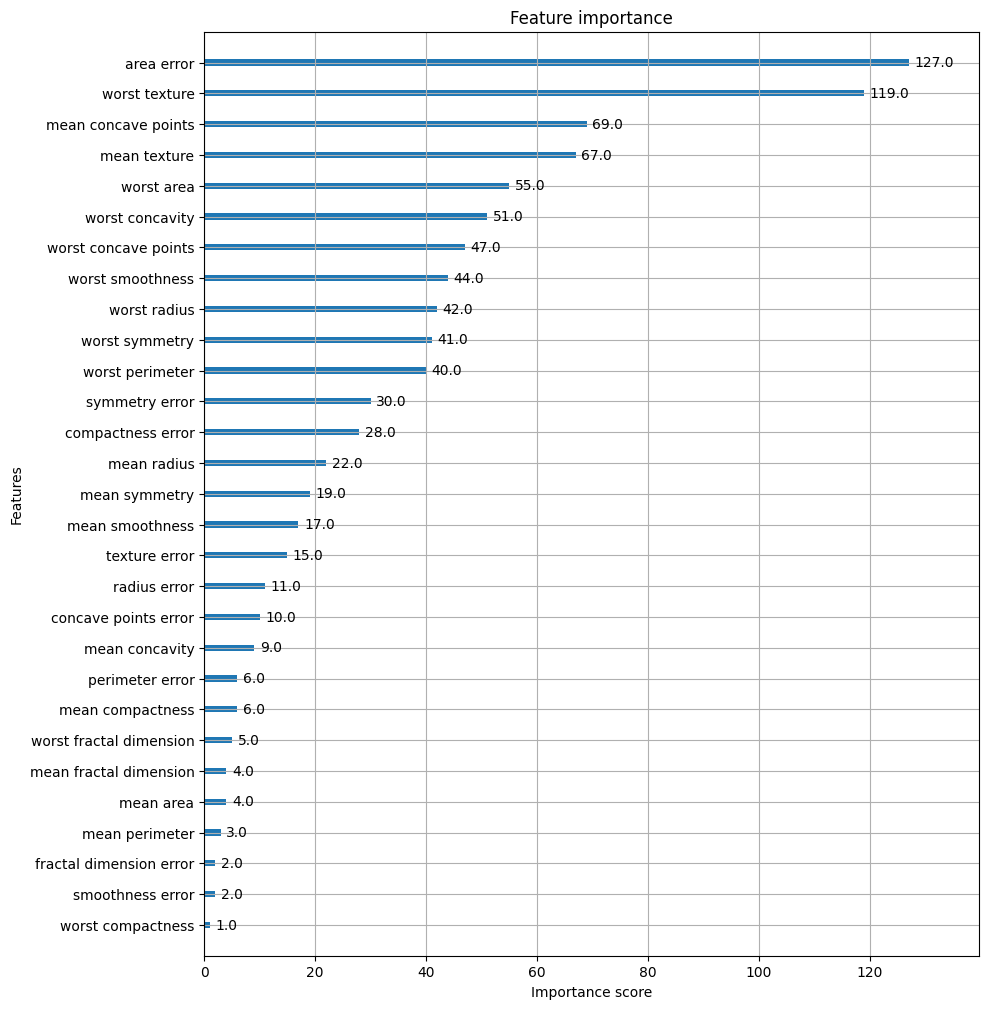

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize = (10,12))
plot_importance(xgb_model, ax = ax)

**사이킷런 래퍼 XGBoost의 개요 및 적용**

파이썬 래퍼 XGBoost는 사이킷런의 GridSearchCV와 유사하게 데이터 세트에 대한 교차 검증 수행 후 최적 파라미터를 구할 수 있는 방법을 cv() API로 제공

*괄호 안은 데이터 타입을 의미, 즉 어떤 형태의 값이 들어가야 하는지를 알려줌*

- params (dict): 부스터 파라미터
- dtrain (DMatrix): 학습 데이터
- num_boost_round (int): 부스팅 반복 횟수 *(예시: num_boost_round = 100)*
- nfold (int): CV 폴드 개수 *(예시: nfold = 5 → 5-폴드 교차검증을 의미)*
- stratified (bool): CV 수행 시 층화 표본 추출 수행 여부 *(예시: stratified=True → 층화 표본추출을 수행하도록 설정)*
- metrics (string or list of strings): CV 수행 시 모니터링할 성능 평가지표
- early_stopping_rounds (int): 조기 중단을 활성화시킴 > 반복 횟수 지정

< XGClassifier 하이퍼 파라미터 >

XGBClassifier는 scikit-learn(사이킷런) 스타일로 설계된 XGBoost 모델

그렇기에 XGClassifier는 호환성을 유지하기 위해 몇 개의 네이티브 하이퍼 파라미터를 다음과 같이 변경

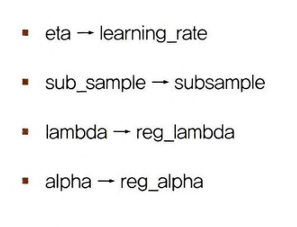

In [15]:
# 사이킷런 래퍼 XGBoost 클래스인 XGBClassifier 임포트
from xgboost import XGBClassifier

# Warning 메시지를 없애기 위해 eval_metric 값을 XGBClassifier 생성 인자로 입력
xgb_wrapper = XGBClassifier(n_estimators = 400, learning_rate = 0.5, max_depth = 3, eval_metric = 'logloss')
xgb_wrapper.fit(X_train, y_train, verbose = True)
w_preds = xgb_wrapper.predict(X_test)
w_pred_proba = xgb_wrapper.predict_proba(X_test)[:, 1]

get_clf_eval(y_test, w_preds, w_pred_proba)

오차 행렬
[[35  2]
 [ 2 75]]
정확도: 0.9649, 정밀도: 0.9740, 재현율: 0.9740, F1:0.9740, AUC:0.9954


In [16]:
from xgboost import XGBClassifier

xgb_wrapper = XGBClassifier(n_estimators = 400, learning_rate = 0.05, max_depth = 3
                          , early_stopping_rounds = 50, eval_metric = "logloss")
evals = [(X_tr, y_tr), (X_val, y_val)]

# 조기 중단 관련 파라미터는 fit()에 입력
# 평가 지표가 향상될 수 있는 반복 횟수를 정의하는 early_stopping_rounds
# 조기 중단을 위한 평가 지표인 eval_metric
# 성능 평가를 수행할 데이터 세트인 eval_set
xgb_wrapper.fit(X_tr, y_tr, eval_set = evals, verbose = True)
ws50_preds = xgb_wrapper.predict(X_test)
ws50_pred_proba = xgb_wrapper.predict_proba(X_test)[:,1]

get_clf_eval(y_test, ws50_preds, ws50_pred_proba)

[0]	validation_0-logloss:0.62473	validation_1-logloss:0.63088
[1]	validation_0-logloss:0.58662	validation_1-logloss:0.60461
[2]	validation_0-logloss:0.55210	validation_1-logloss:0.58205
[3]	validation_0-logloss:0.52068	validation_1-logloss:0.56165
[4]	validation_0-logloss:0.49173	validation_1-logloss:0.54101
[5]	validation_0-logloss:0.46517	validation_1-logloss:0.52206
[6]	validation_0-logloss:0.44009	validation_1-logloss:0.50271
[7]	validation_0-logloss:0.41646	validation_1-logloss:0.48606
[8]	validation_0-logloss:0.39505	validation_1-logloss:0.46961
[9]	validation_0-logloss:0.37523	validation_1-logloss:0.45485
[10]	validation_0-logloss:0.35682	validation_1-logloss:0.44120
[11]	validation_0-logloss:0.33964	validation_1-logloss:0.43123
[12]	validation_0-logloss:0.32279	validation_1-logloss:0.41962
[13]	validation_0-logloss:0.30783	validation_1-logloss:0.40848
[14]	validation_0-logloss:0.29308	validation_1-logloss:0.39857
[15]	validation_0-logloss:0.27928	validation_1-logloss:0.38945
[1

In [17]:
get_clf_eval(y_test, ws50_preds, ws50_pred_proba)

오차 행렬
[[35  2]
 [ 2 75]]
정확도: 0.9649, 정밀도: 0.9740, 재현율: 0.9740, F1:0.9740, AUC:0.9965


In [18]:
# early_stopping_rounds를 10으로 설정하고 재학습
xgb_wrapper = XGBClassifier(n_estimators = 400, learning_rate = 0.05, max_depth = 3
                          , early_stopping_rounds = 10, eval_metric = "logloss")
evals = [(X_tr, y_tr), (X_val, y_val)]
xgb_wrapper.fit(X_tr, y_tr, eval_set = evals, verbose = True)
ws10_preds = xgb_wrapper.predict(X_test)
ws10_pred_proba = xgb_wrapper.predict_proba(X_test)[:,1]

[0]	validation_0-logloss:0.62473	validation_1-logloss:0.63088
[1]	validation_0-logloss:0.58662	validation_1-logloss:0.60461
[2]	validation_0-logloss:0.55210	validation_1-logloss:0.58205
[3]	validation_0-logloss:0.52068	validation_1-logloss:0.56165
[4]	validation_0-logloss:0.49173	validation_1-logloss:0.54101
[5]	validation_0-logloss:0.46517	validation_1-logloss:0.52206
[6]	validation_0-logloss:0.44009	validation_1-logloss:0.50271
[7]	validation_0-logloss:0.41646	validation_1-logloss:0.48606
[8]	validation_0-logloss:0.39505	validation_1-logloss:0.46961
[9]	validation_0-logloss:0.37523	validation_1-logloss:0.45485
[10]	validation_0-logloss:0.35682	validation_1-logloss:0.44120
[11]	validation_0-logloss:0.33964	validation_1-logloss:0.43123
[12]	validation_0-logloss:0.32279	validation_1-logloss:0.41962
[13]	validation_0-logloss:0.30783	validation_1-logloss:0.40848
[14]	validation_0-logloss:0.29308	validation_1-logloss:0.39857
[15]	validation_0-logloss:0.27928	validation_1-logloss:0.38945
[1

In [19]:
get_clf_eval(y_test, ws10_preds, ws10_pred_proba)

오차 행렬
[[36  1]
 [ 2 75]]
정확도: 0.9737, 정밀도: 0.9868, 재현율: 0.9740, F1:0.9804, AUC:0.9958


<Axes: title={'center': 'Feature importance'}, xlabel='Importance score', ylabel='Features'>

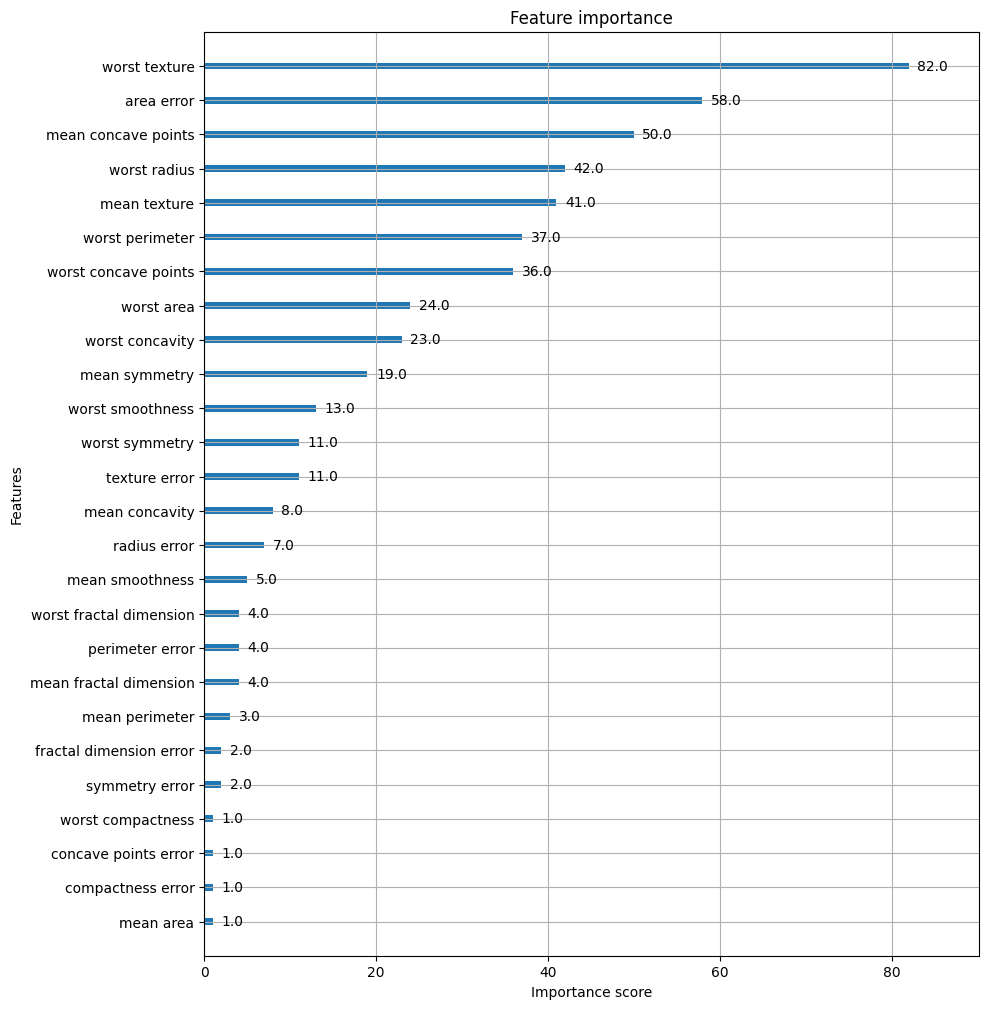

In [20]:
from xgboost import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize = (10,12))
# 사이킷런 래퍼 클래스를 입력해도 무방
plot_importance(xgb_wrapper, ax = ax)